In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a Pandas DataFrame from the dataset
data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable to the DataFrame
data['target'] = housing.target

In [3]:
import sys
sys.path.append('..')
from xDL.models.NAM import NAM

In [4]:

nam = NAM(
    "target ~  -1 + CubicSplineNet(MedInc, n_knots=[15]) + CubicSplineNet(Latitude, n_knots=[15]) + CubicSplineNet(Longitude, n_knots=[15]) + CubicSplineNet(AveRooms, n_knots=[15])", 
    data=data, 
    feature_dropout=0.0001
    )

In [5]:
nam.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

# Train the model
nam.fit(nam.training_dataset, epochs=100, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/100
17/17 [==============================] - 2s 23ms/step - loss: 4.9813 - val_loss: 4.4348
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 4.0805 - val_loss: 3.8008
Epoch 3/100
17/17 [==============================] - 0s 9ms/step - loss: 3.5654 - val_loss: 3.3897
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 3.2779 - val_loss: 3.1366
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 3.1194 - val_loss: 3.0094
Epoch 6/100
17/17 [==============================] - 0s 9ms/step - loss: 2.9873 - val_loss: 2.8752
Epoch 7/100
17/17 [==============================] - 0s 9ms/step - loss: 2.8651 - val_loss: 2.7994
Epoch 8/100
17/17 [==============================] - 0s 9ms/step - loss: 2.7527 - val_loss: 2.7251
Epoch 9/100
17/17 [==============================] - 0s 9ms/step - loss: 2.6642 - val_loss: 2.6802
Epoch 10/100
17/17 [==============================] - 0s 9ms/step - loss: 2.5718 - val_loss: 2.4586
Epoch 1

17/17 [==============================] - 0s 4ms/step


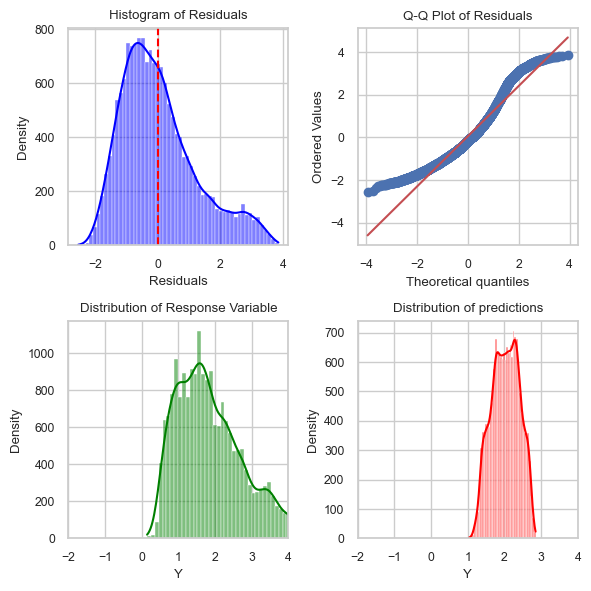

In [6]:
nam.analytics_plot()

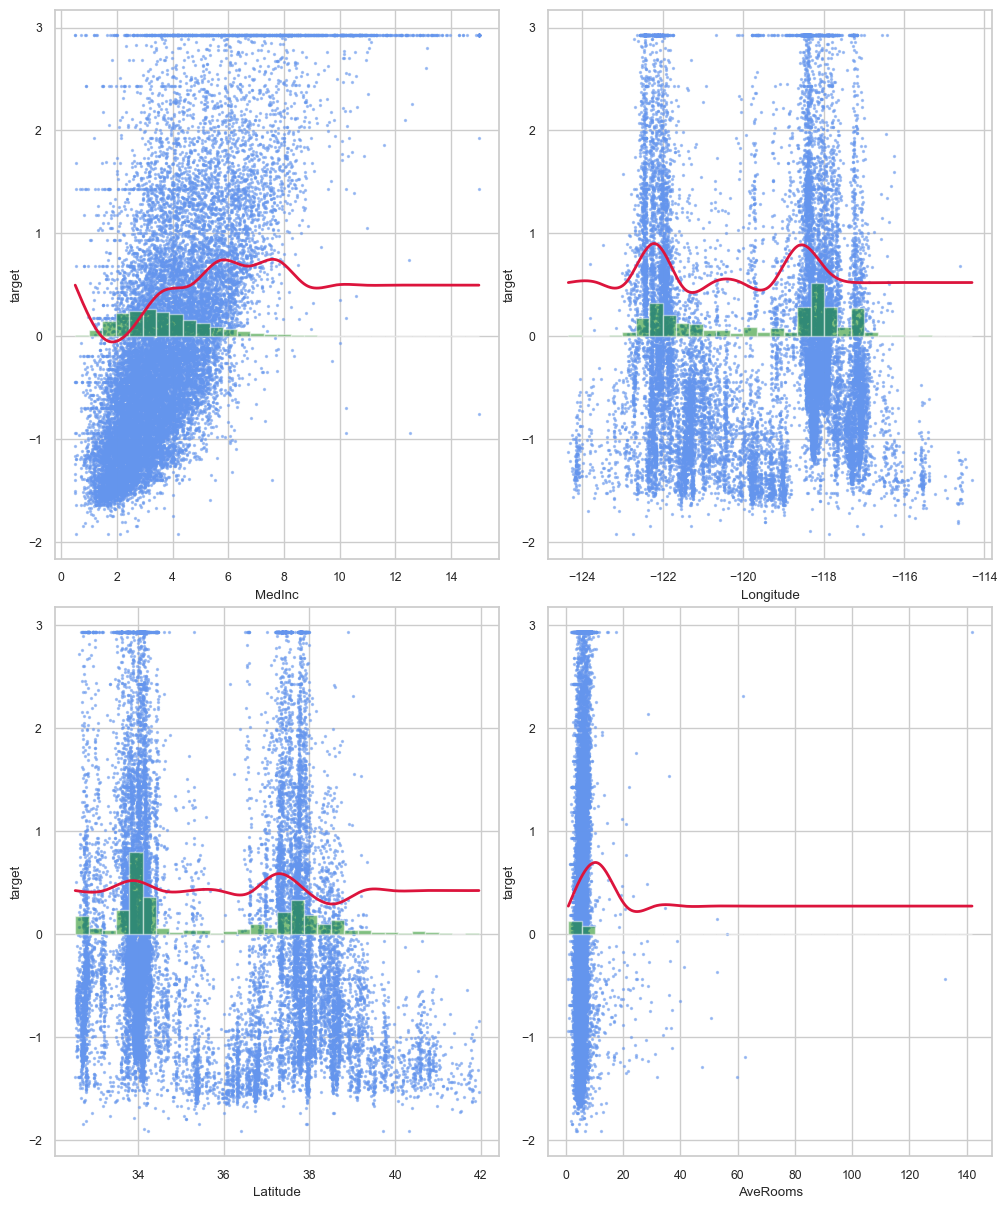

In [7]:
nam.plot()